# GRCh38 DNase 12 kb CAE Architecture Search 2

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import json
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# The base directory is one level up
base = '..'
settings_filepath = '../settings-grch38-dnase-12kb.json'
search_filepath = '../cnn-search-2.json'

with open(settings_filepath, "r") as f:
    settings = json.load(f)

with open(search_filepath, "r") as f:
    optimizer_search = json.load(f)

## Create training jobs

In [2]:
from jobs import jobs

jobs(
    os.path.relpath(search_filepath, base),
    os.path.relpath(settings_filepath, base),
    dataset="cnn-search",
    name="cnn-search-2",
    cluster="seas",
    epochs=25,
    batch_size=1024,
    base=base,
    clear=True,
    verbose=False
)


Created slurm file for training 144 neural networks


## Test training run of the most complex CAE

In [ ]:
from train import train_on_single_dataset

model_name = 'cf-64-128-256--ck-7-5-3--du-1024-512-256-64-32--do-0.1-0.1-0.1-0.1-0.1-0.1-0.1-0.1--e-6--rl-0.001--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-'

with open('../models/{}.json'.format(model_name), 'r') as f:
    definition = json.load(f)

train_on_single_dataset(
    settings,
    'cnn-search',
    definition,
    epochs=2,
    batch_size=256,
    peak_weight=2,
    signal_weighting='logn',
    signal_weighting_zero_point_percentage=0.02,
    base=base,
    clear=True,
)

## Create evaluation jobs

In [17]:
from evaluate import create_jobs

create_jobs(
    'cnn-search-2',
    name='cnn-search-2',
    dataset='cnn-search',
    cluster='seas',
    base=base,
    clear=True,
    incl_dtw=False,
)

Created slurm file for evaluating 116 neural networks


In a terminal run: `sbatch evaluate-cnn-search-2.slurm`

## Compare

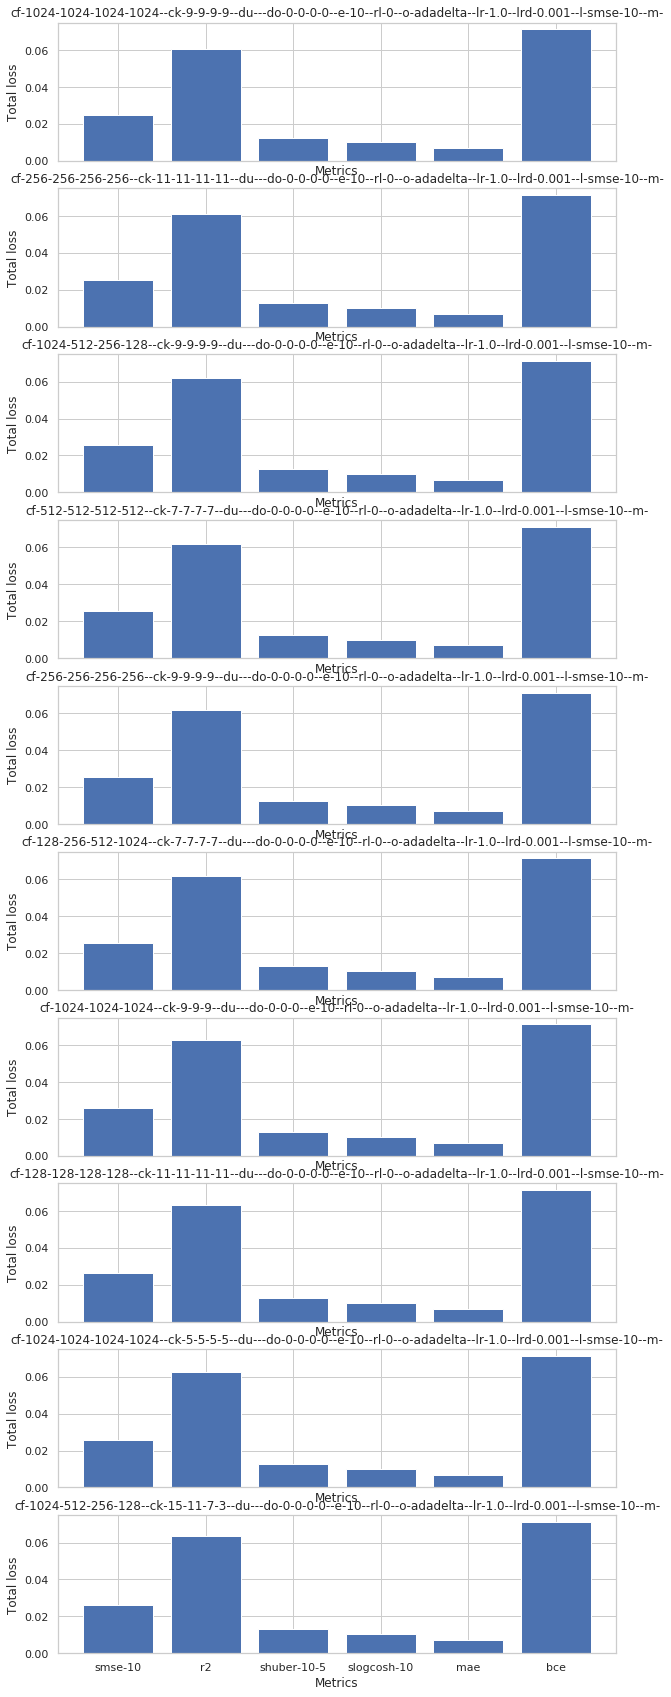

In [2]:
from compare import compare
    
performance = compare(
    'definitions-cnn-search-2.json',
    dataset_name='cnn-search',
    base=base,
    clear=False,
    verbose=False,
    silent=False,
    remove_common_prefix_from_df=True,
)

In [8]:
import qgrid

qgw = qgrid.show_grid(performance)
qgw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

1024-1024-1024-1024--ck-9-9-9-9--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


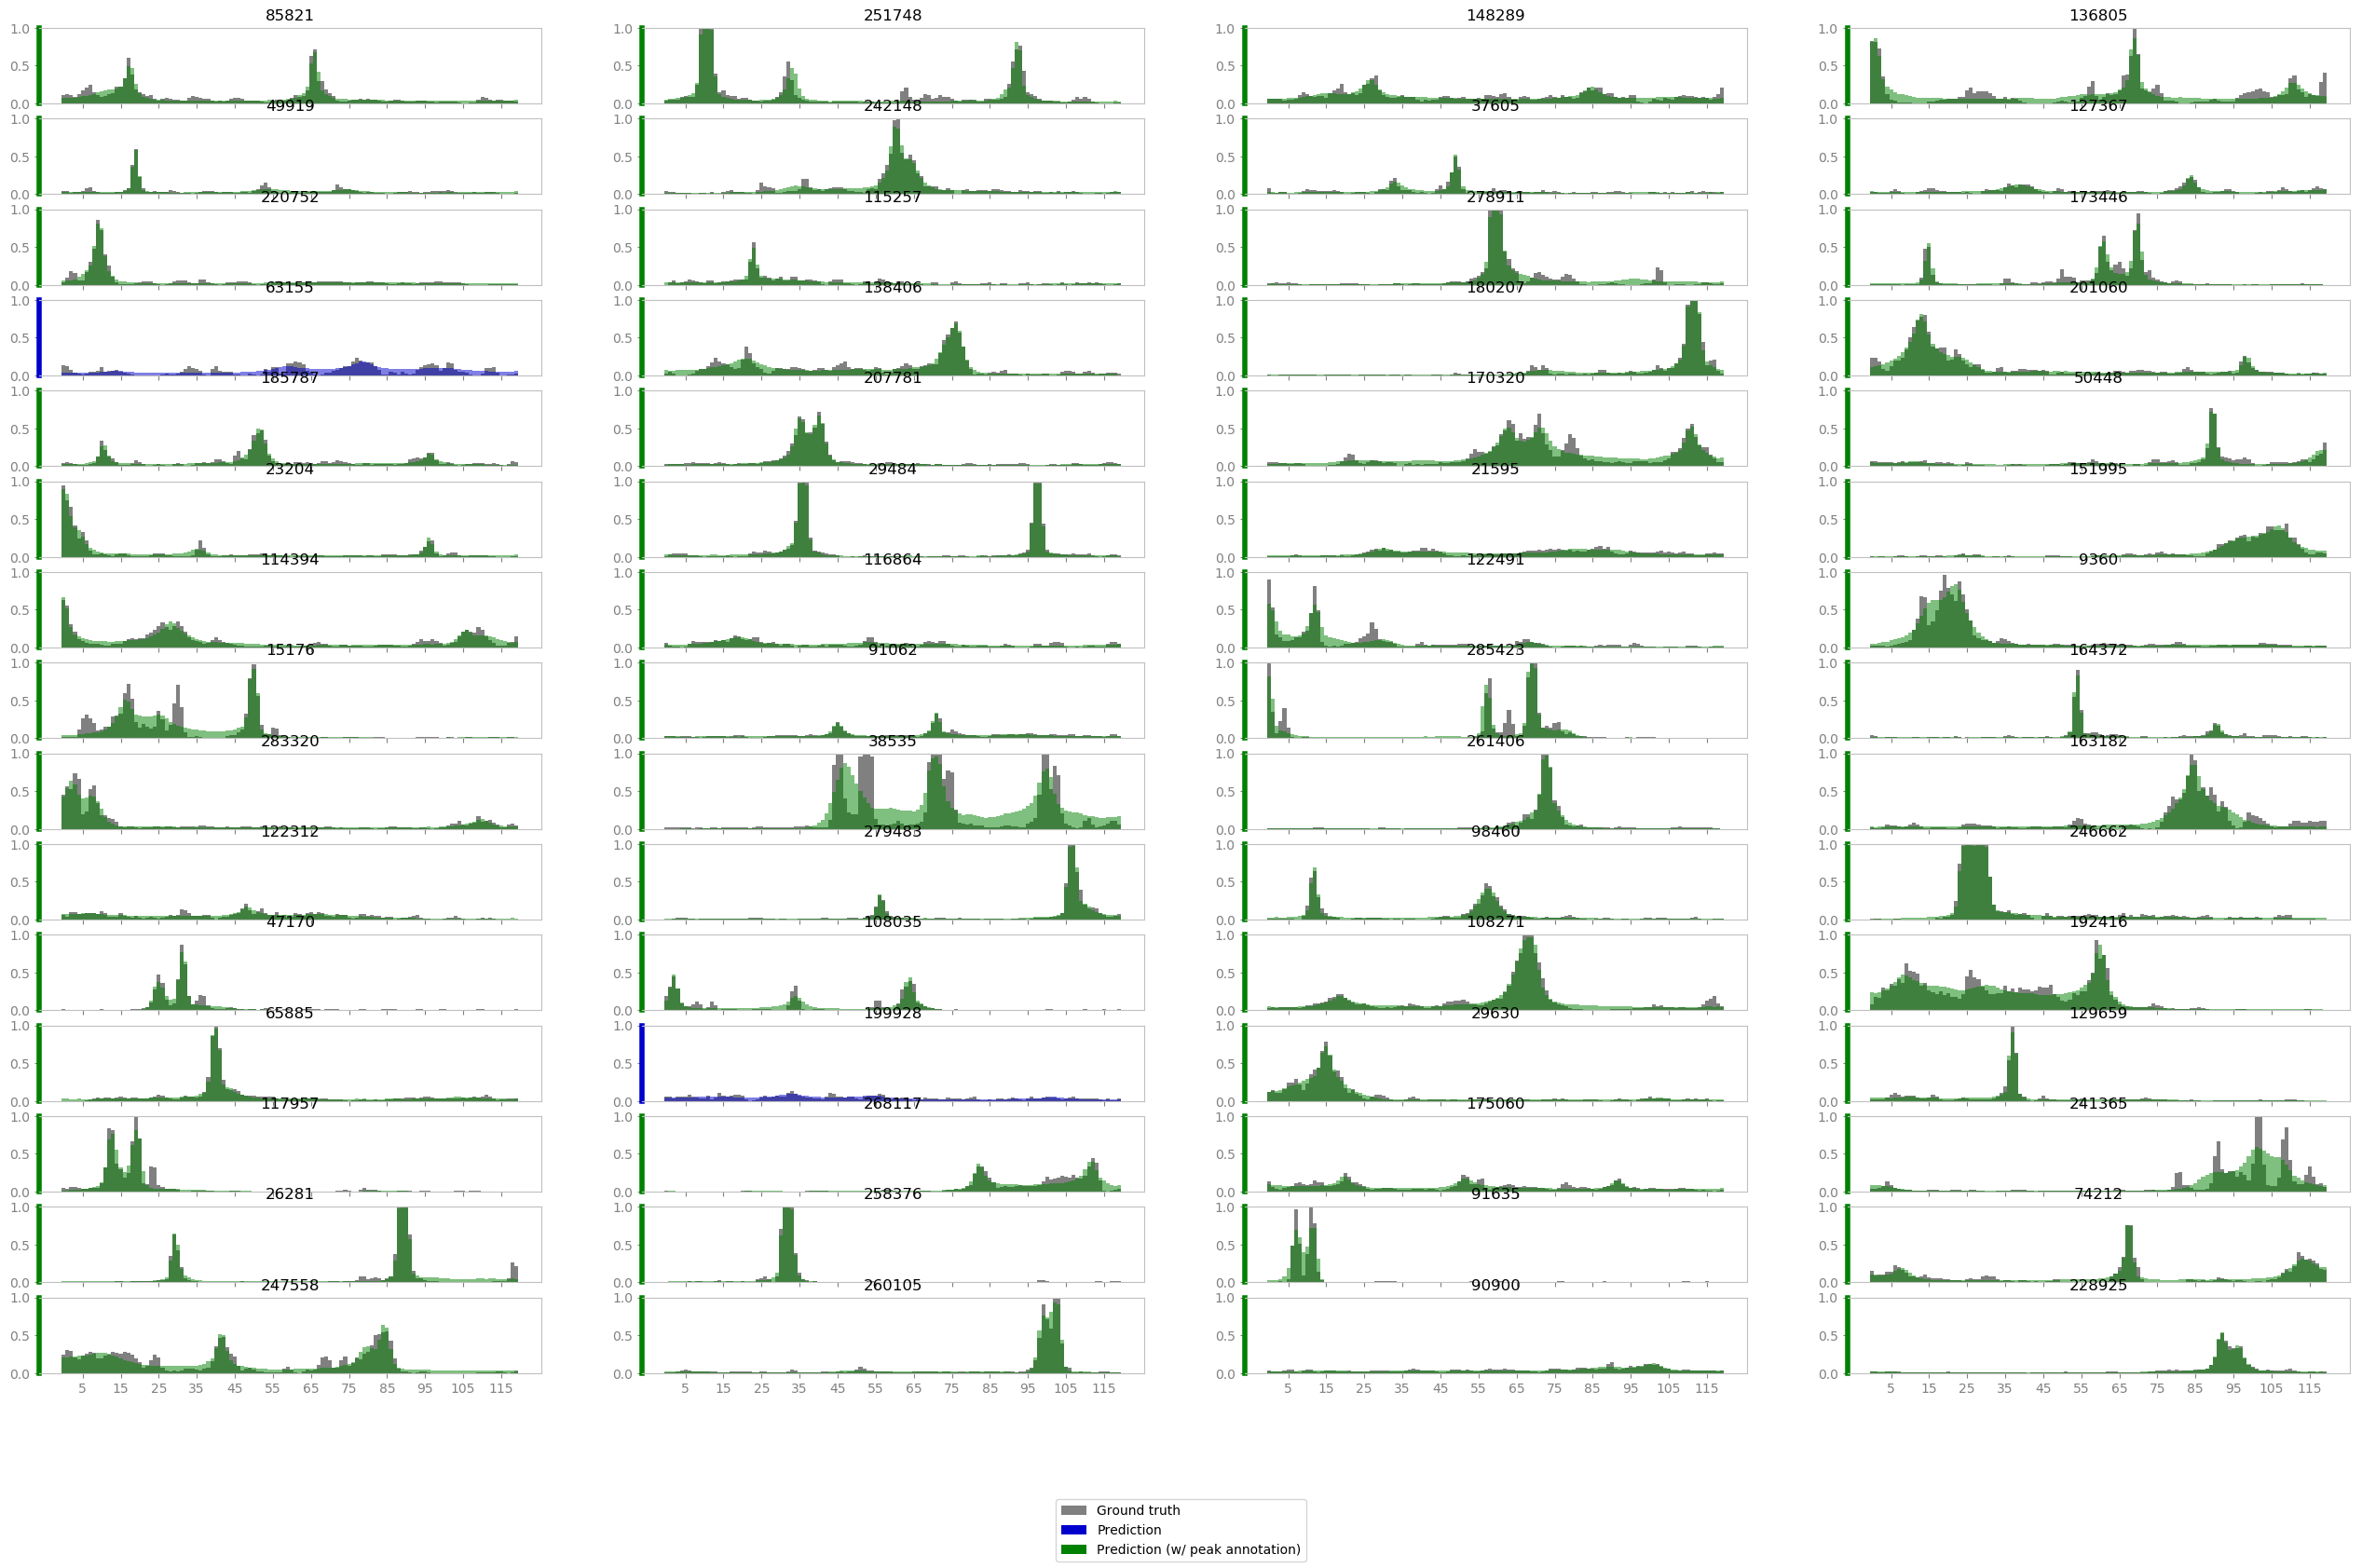

256-256-256-256--ck-11-11-11-11--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


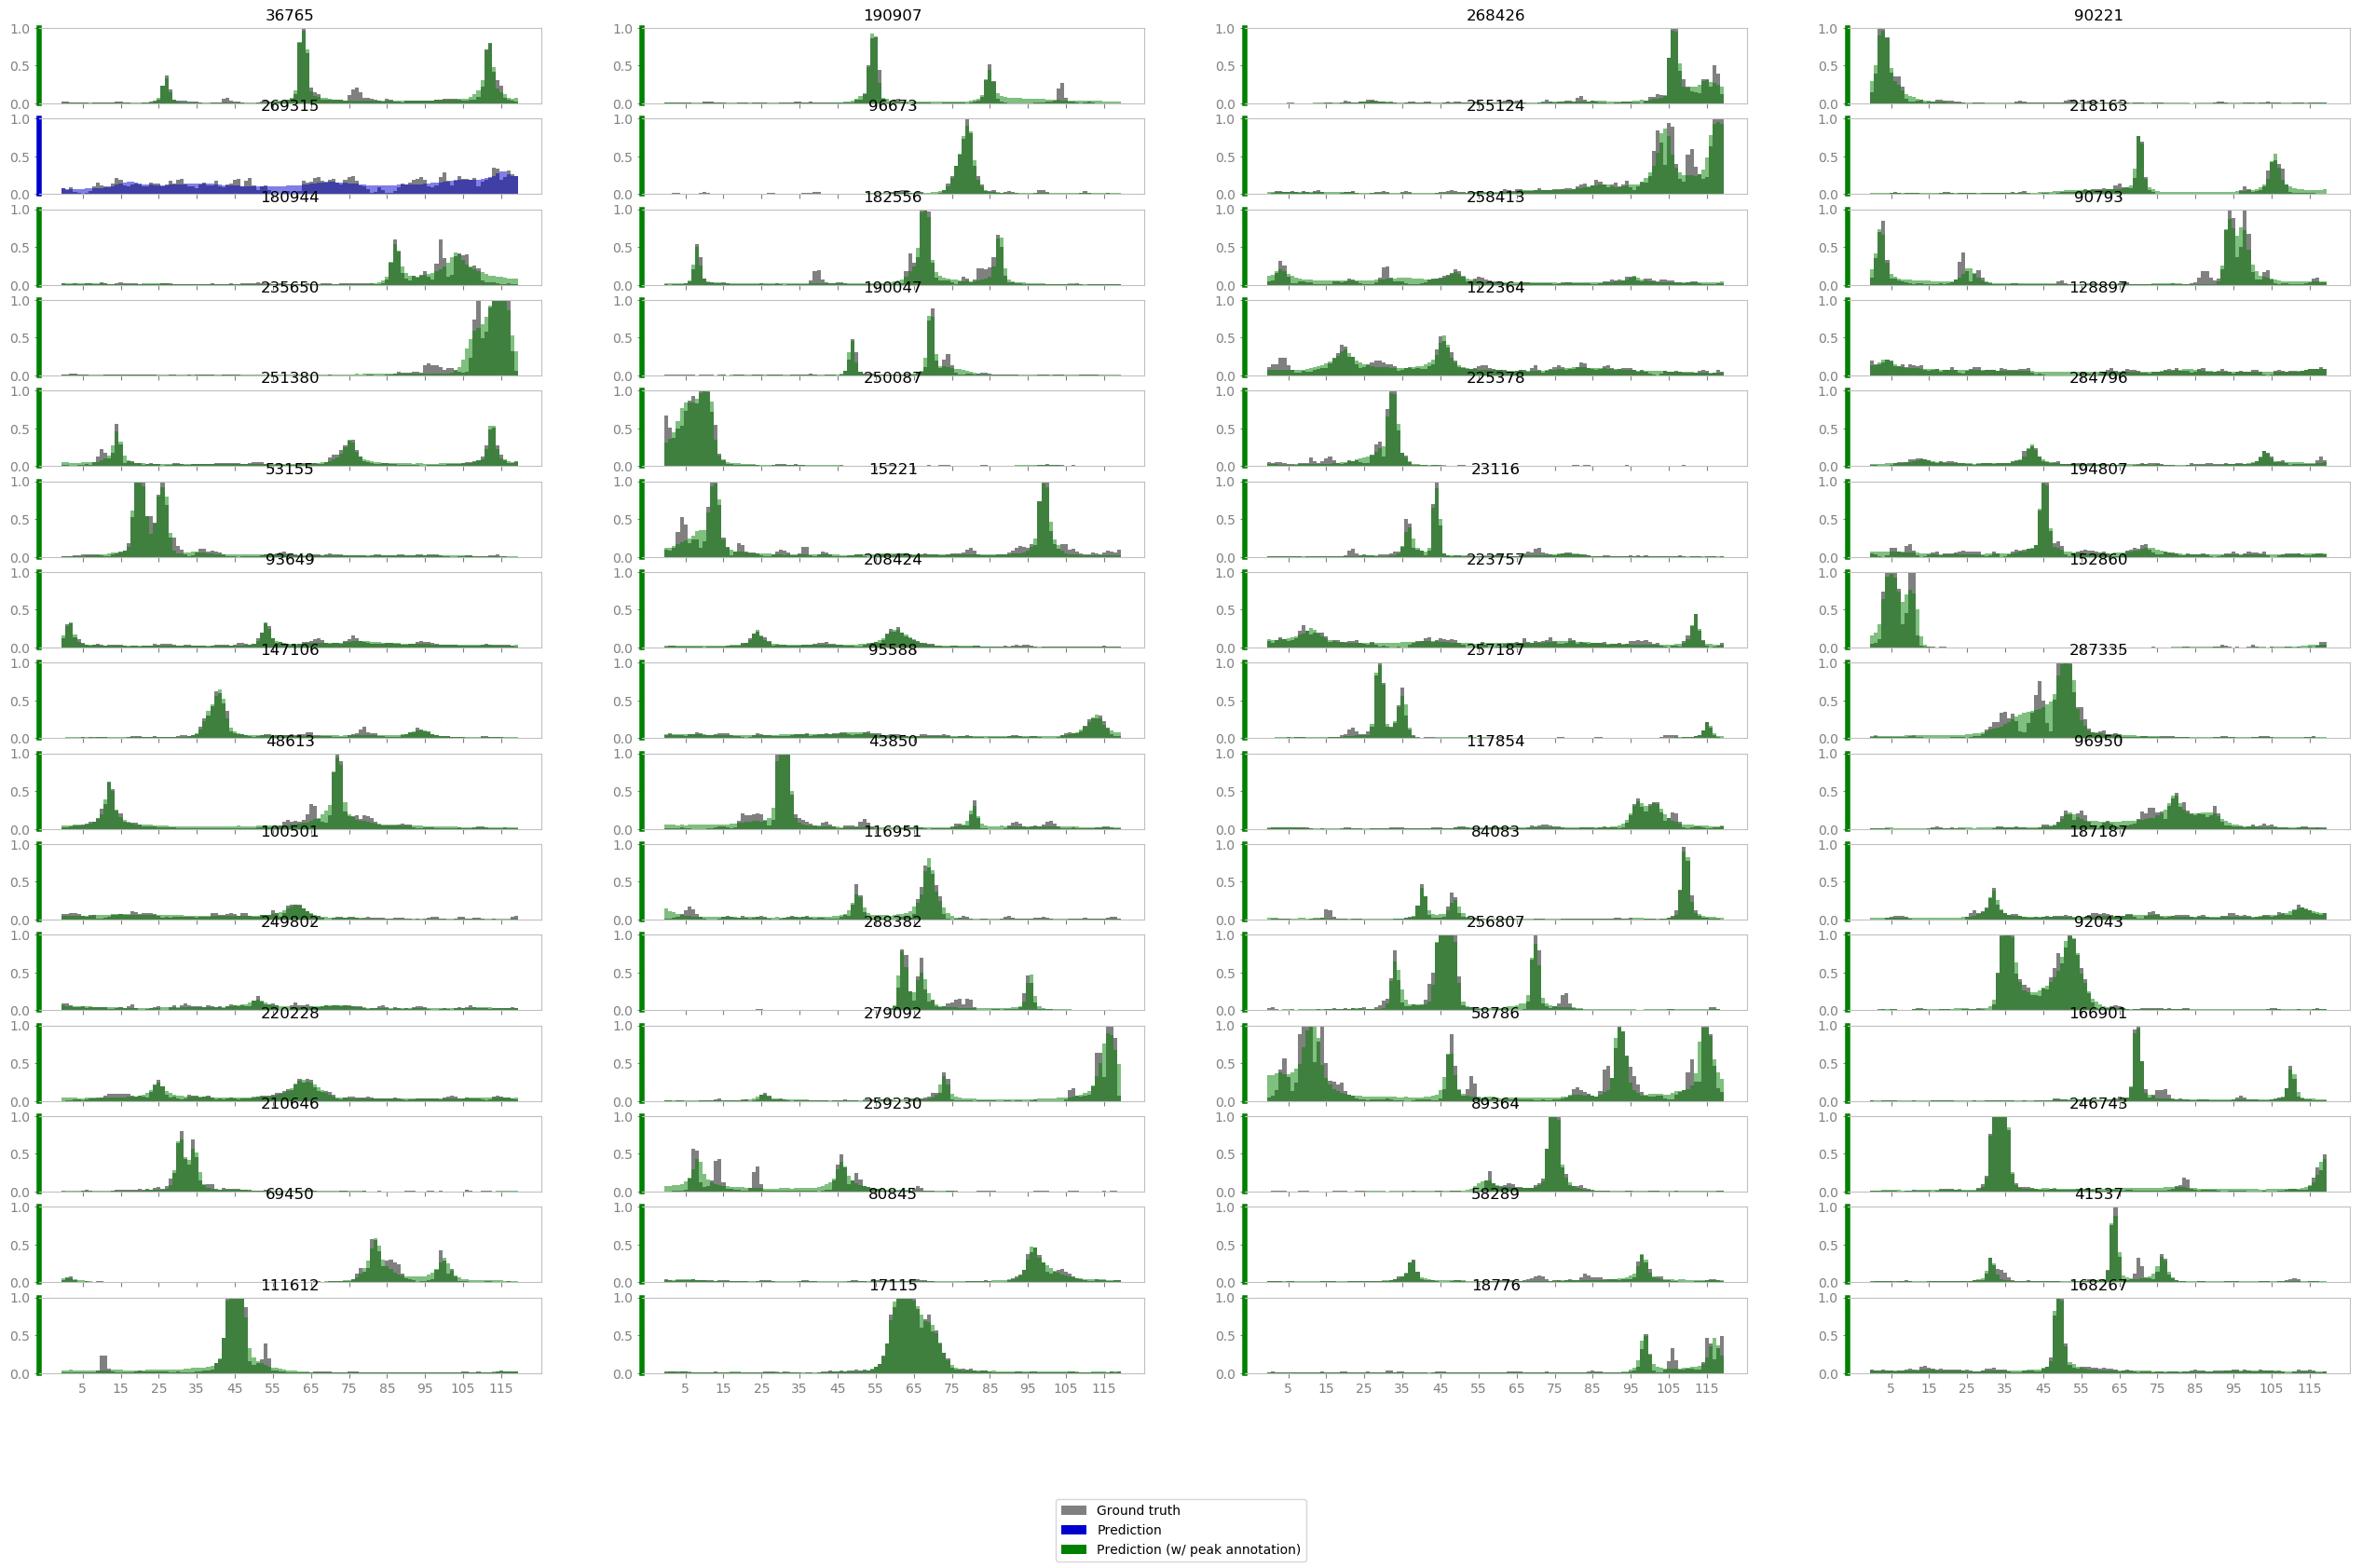

1024-512-256-128--ck-9-9-9-9--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


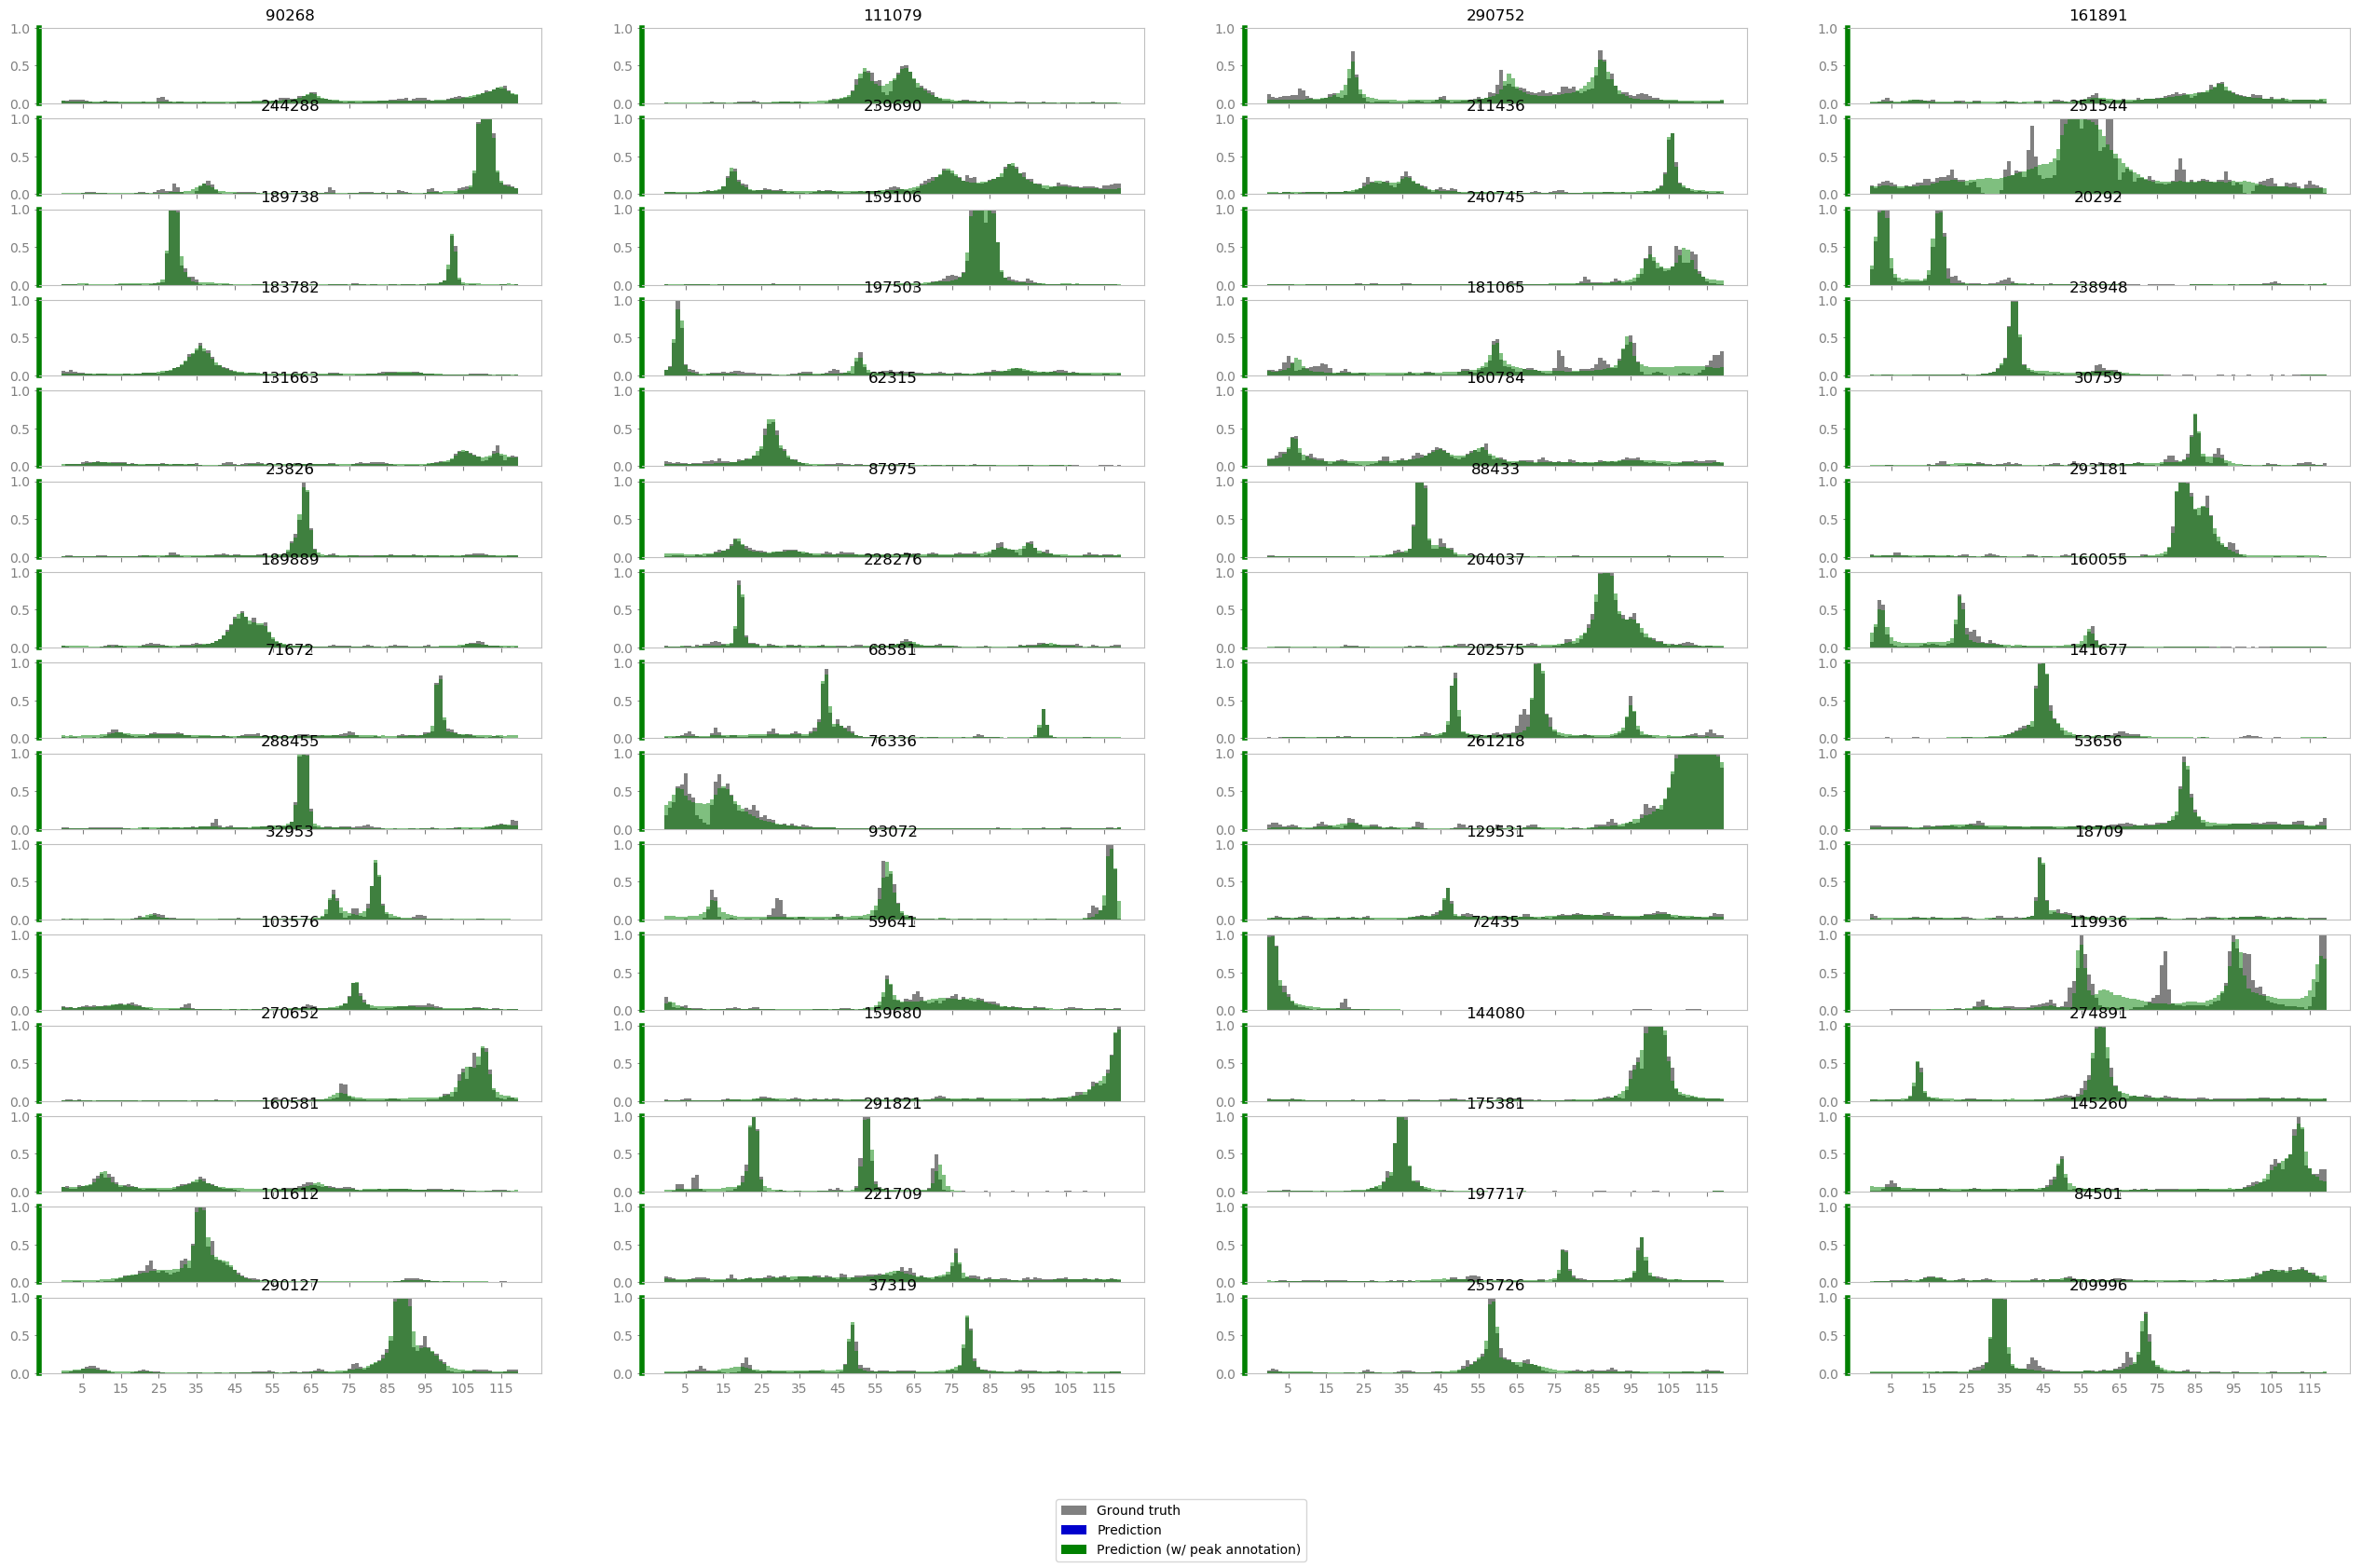

128-256-512-1024--ck-7-7-7-7--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


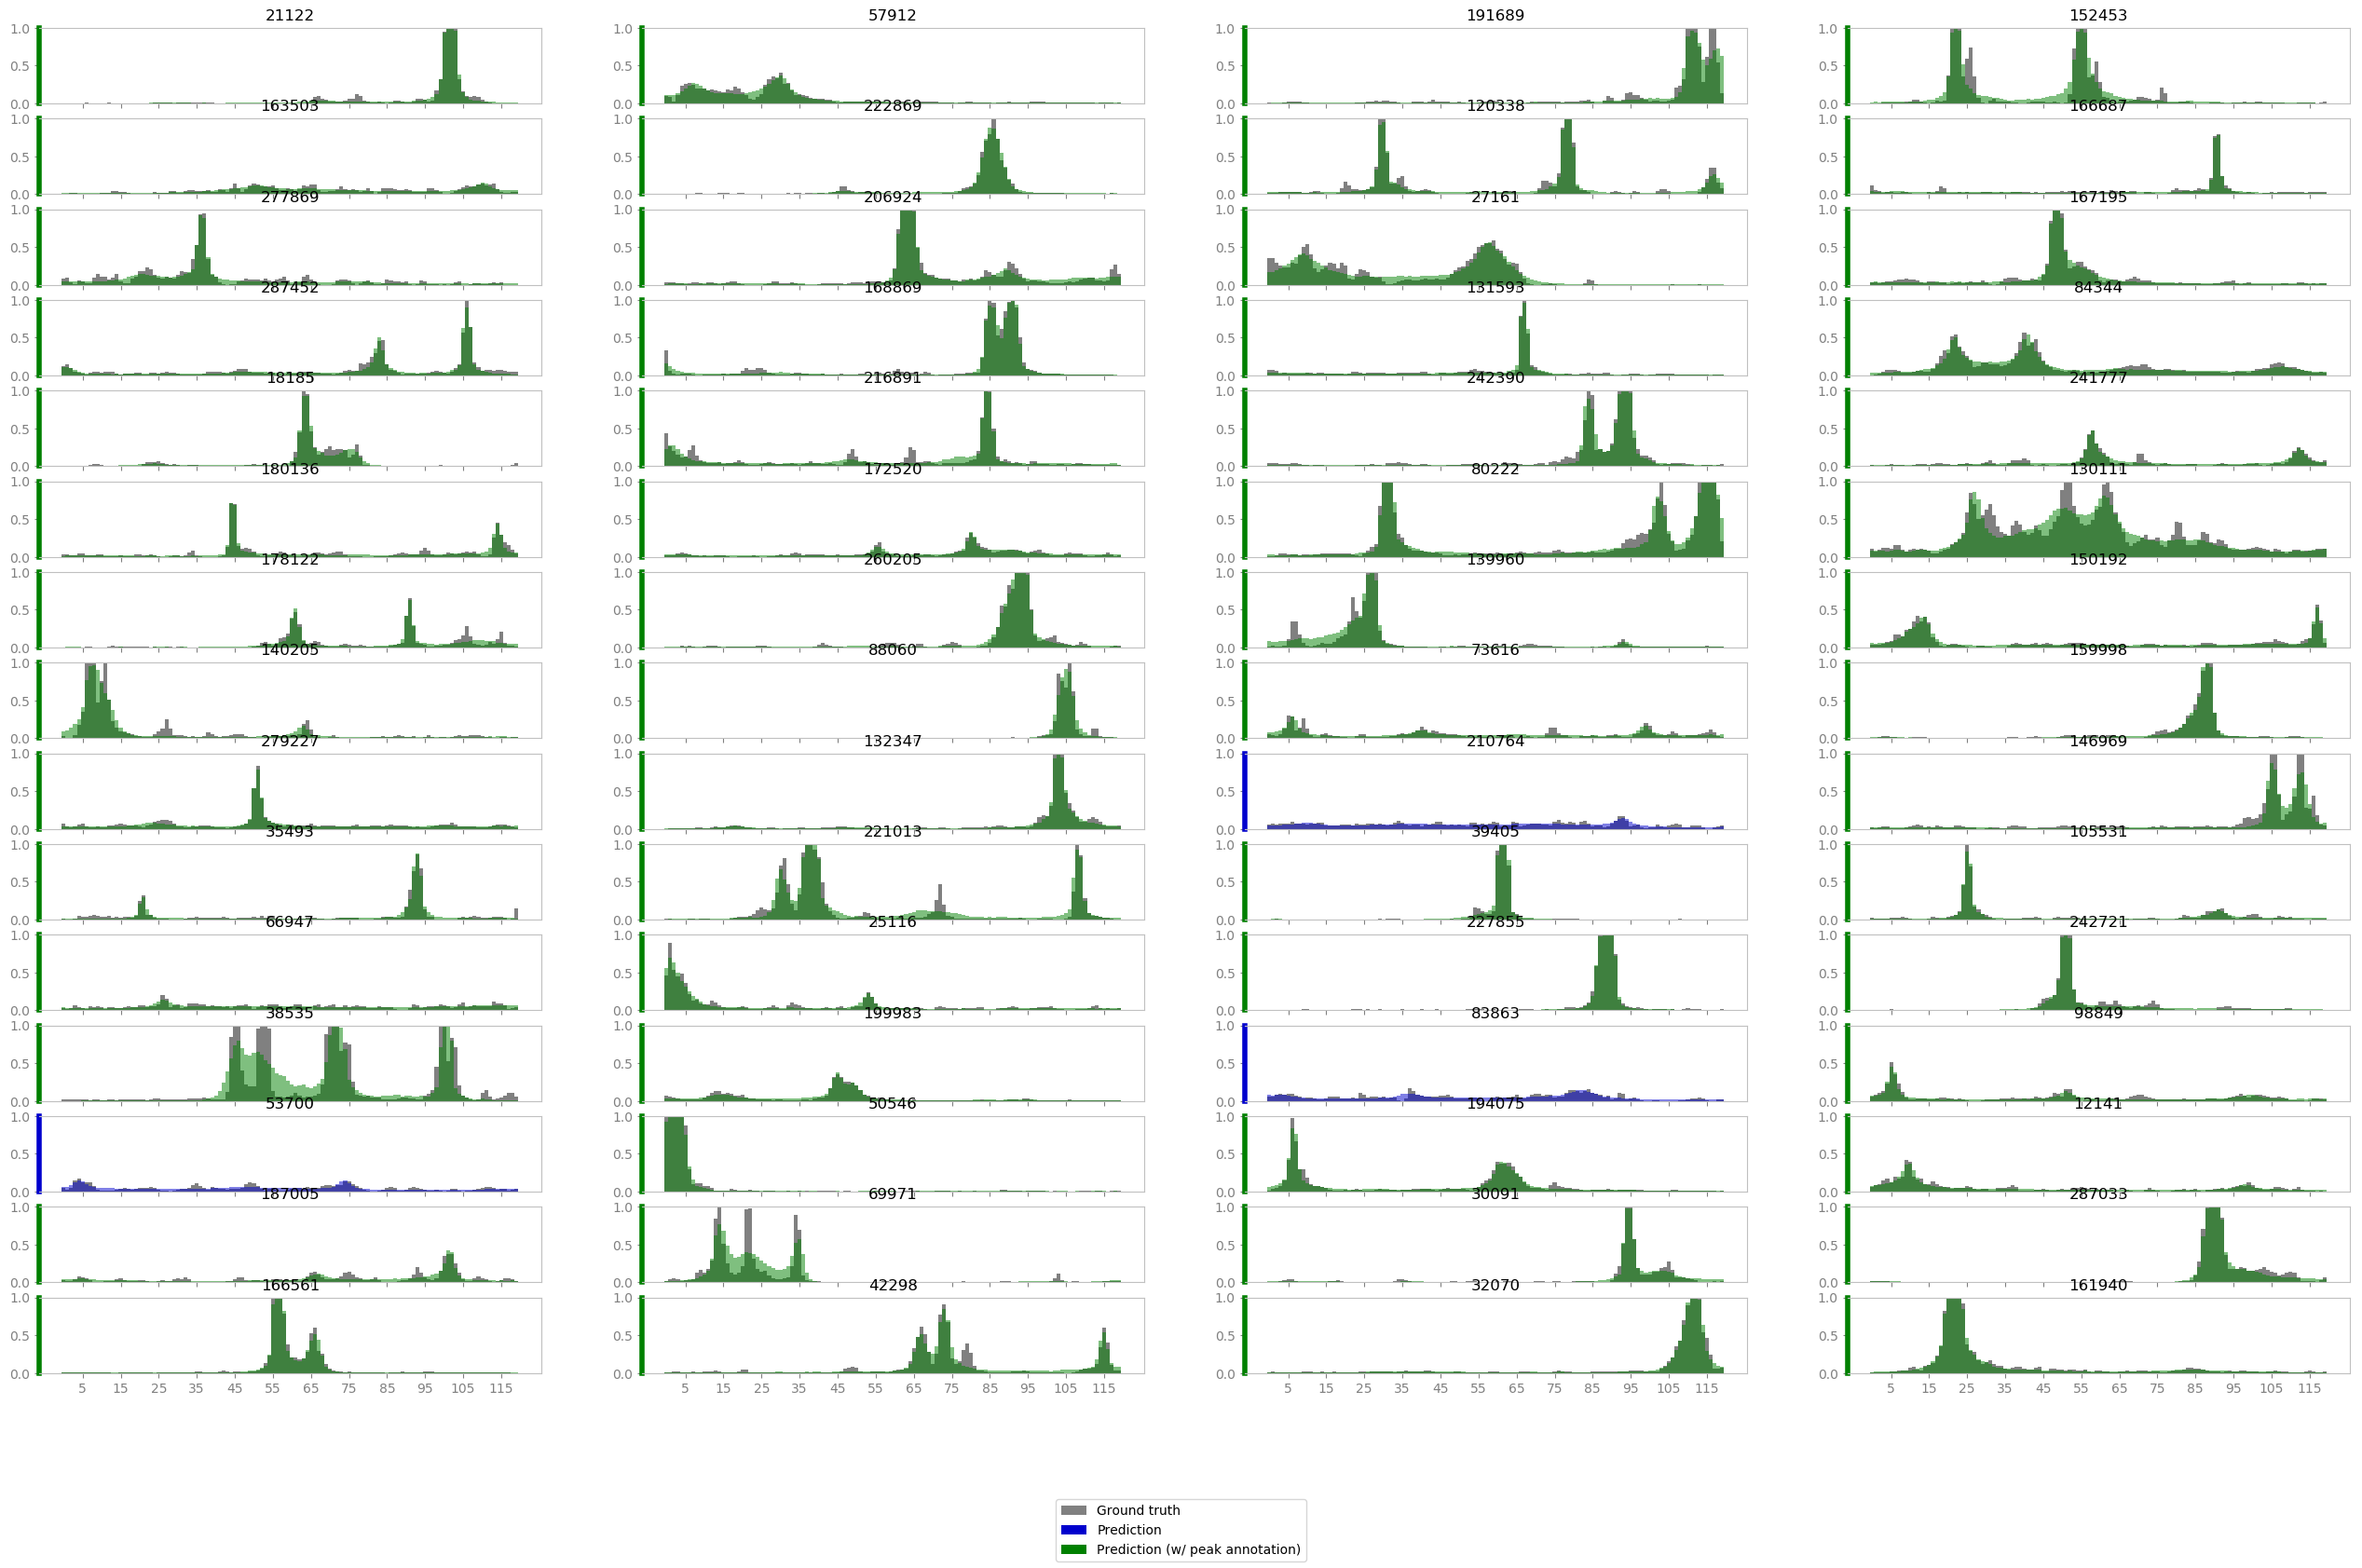

64-128-256-512--ck-15-11-7-3--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


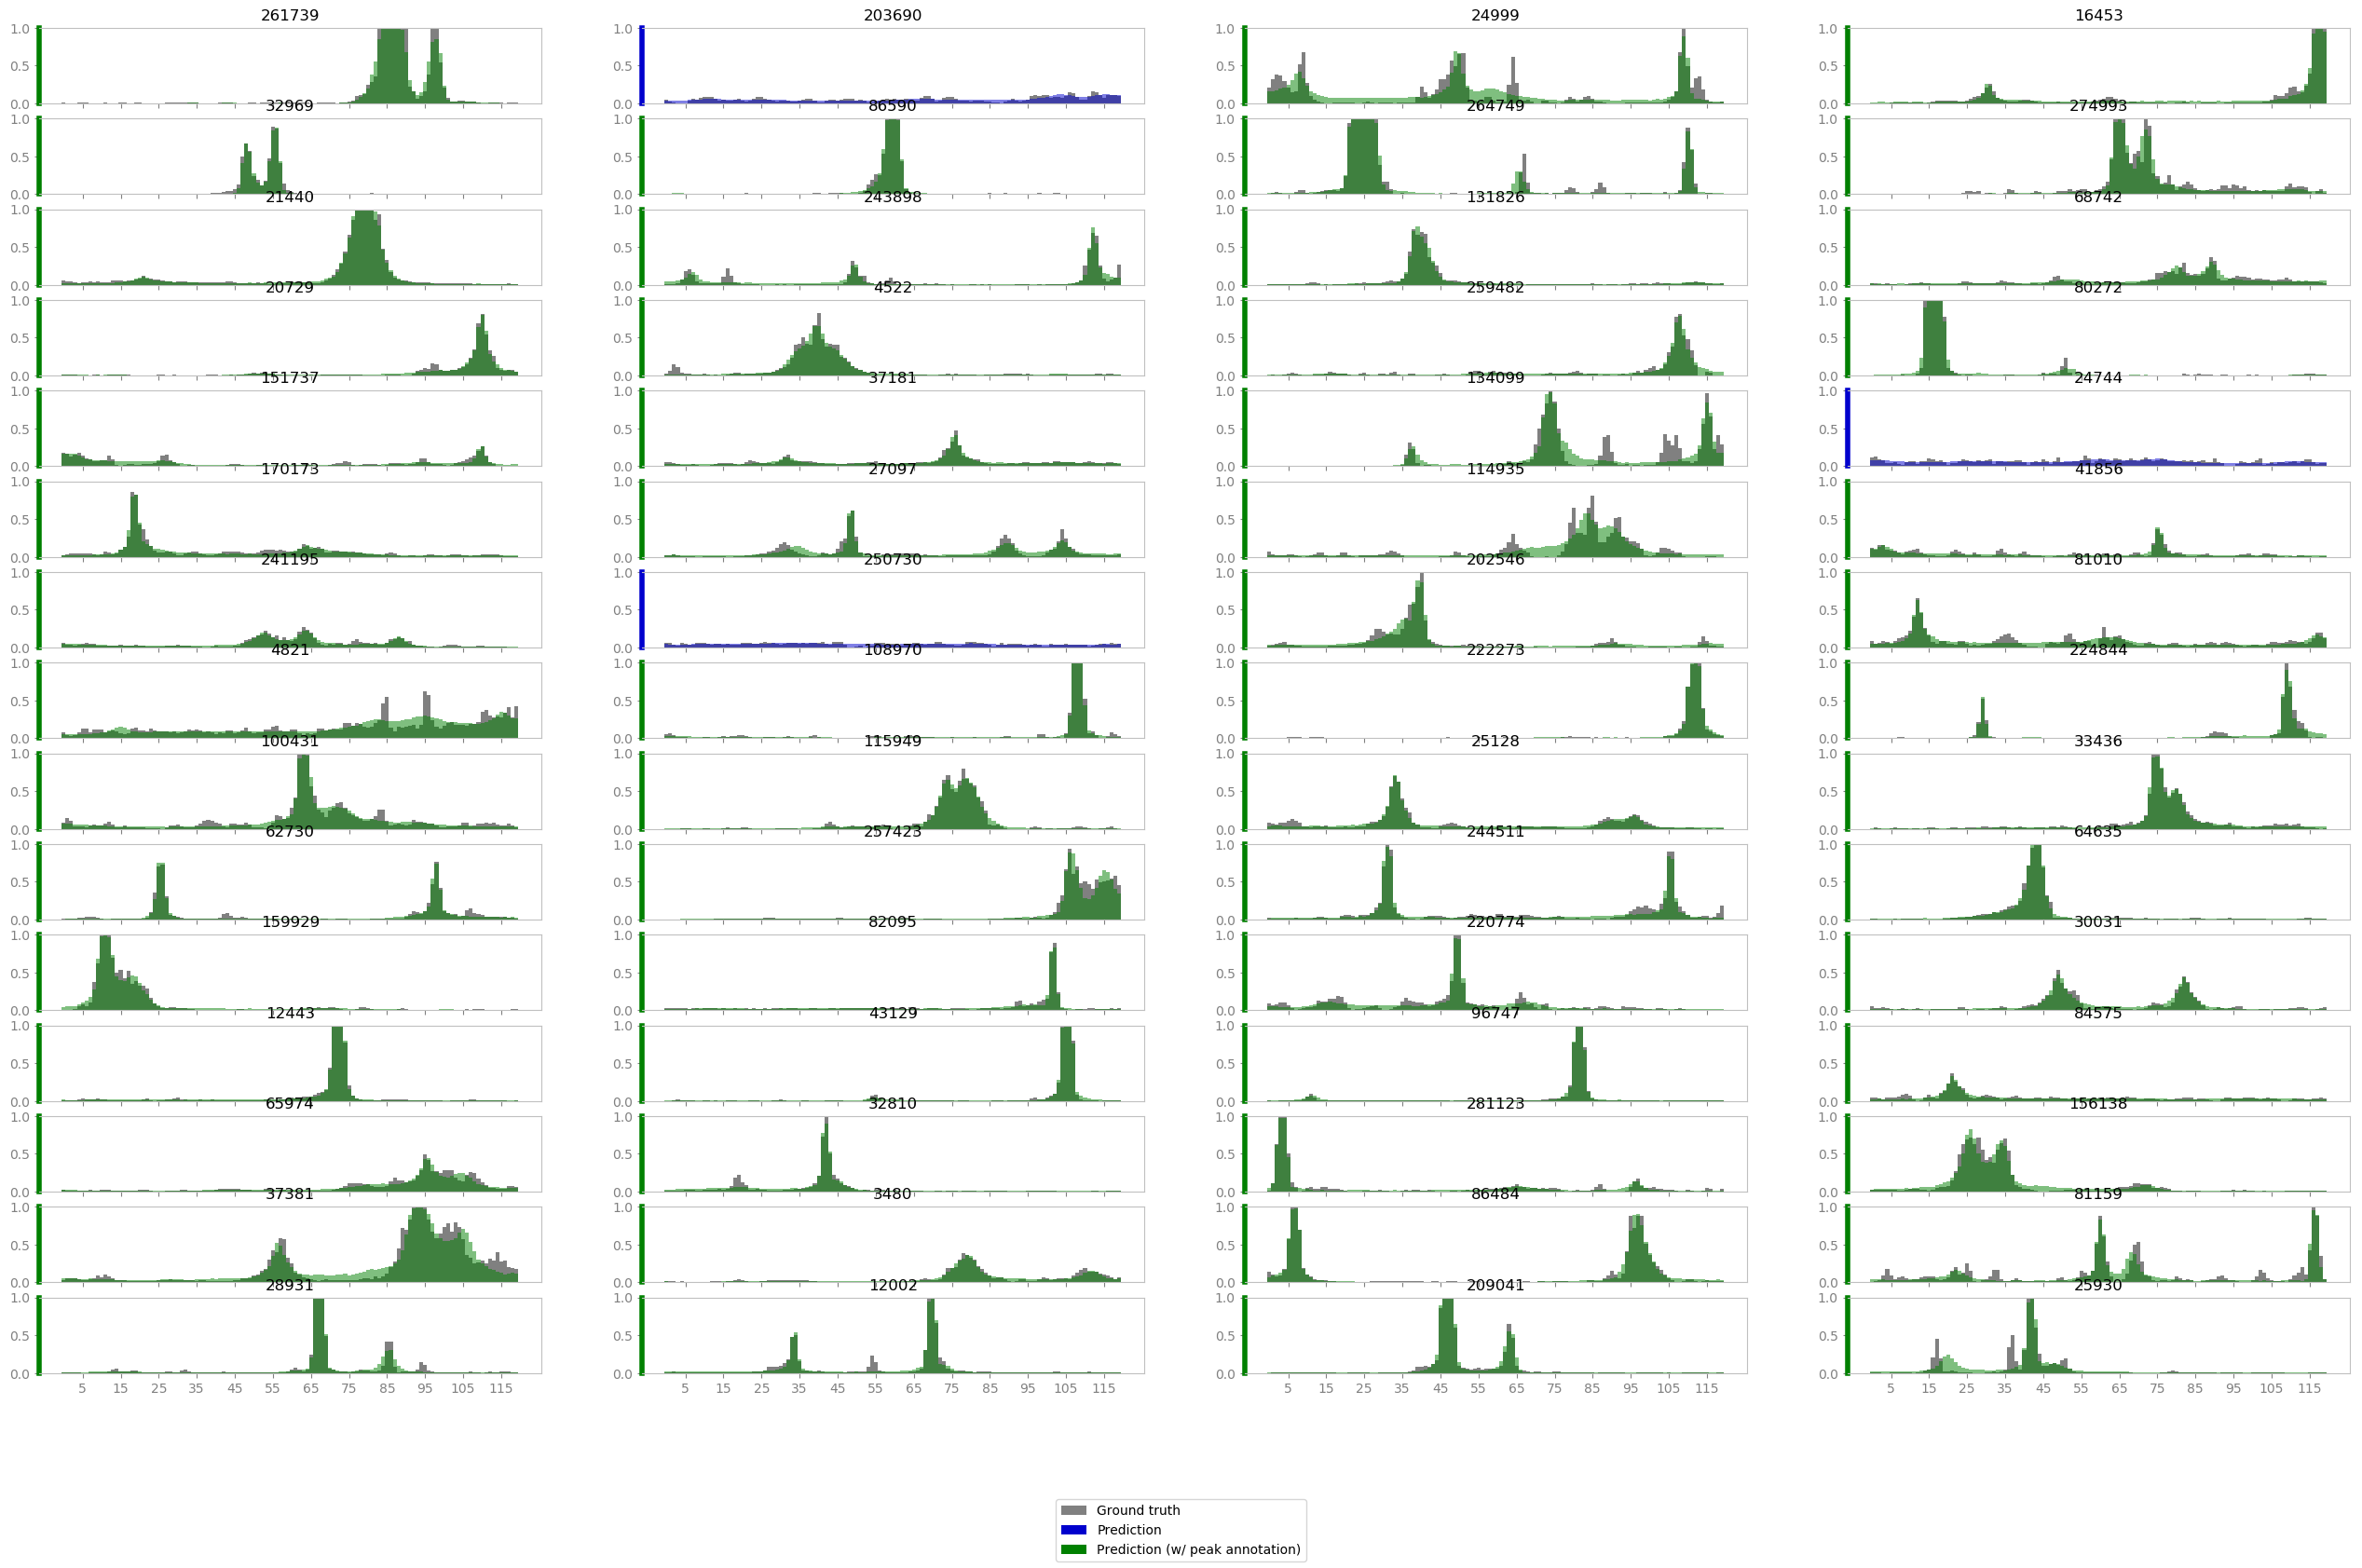

128-256-512-1024--ck-3-5-7-9--du---do-0-0-0-0--e-10--rl-0--o-adadelta--lr-1.0--lrd-0.001--l-smse-10--m-


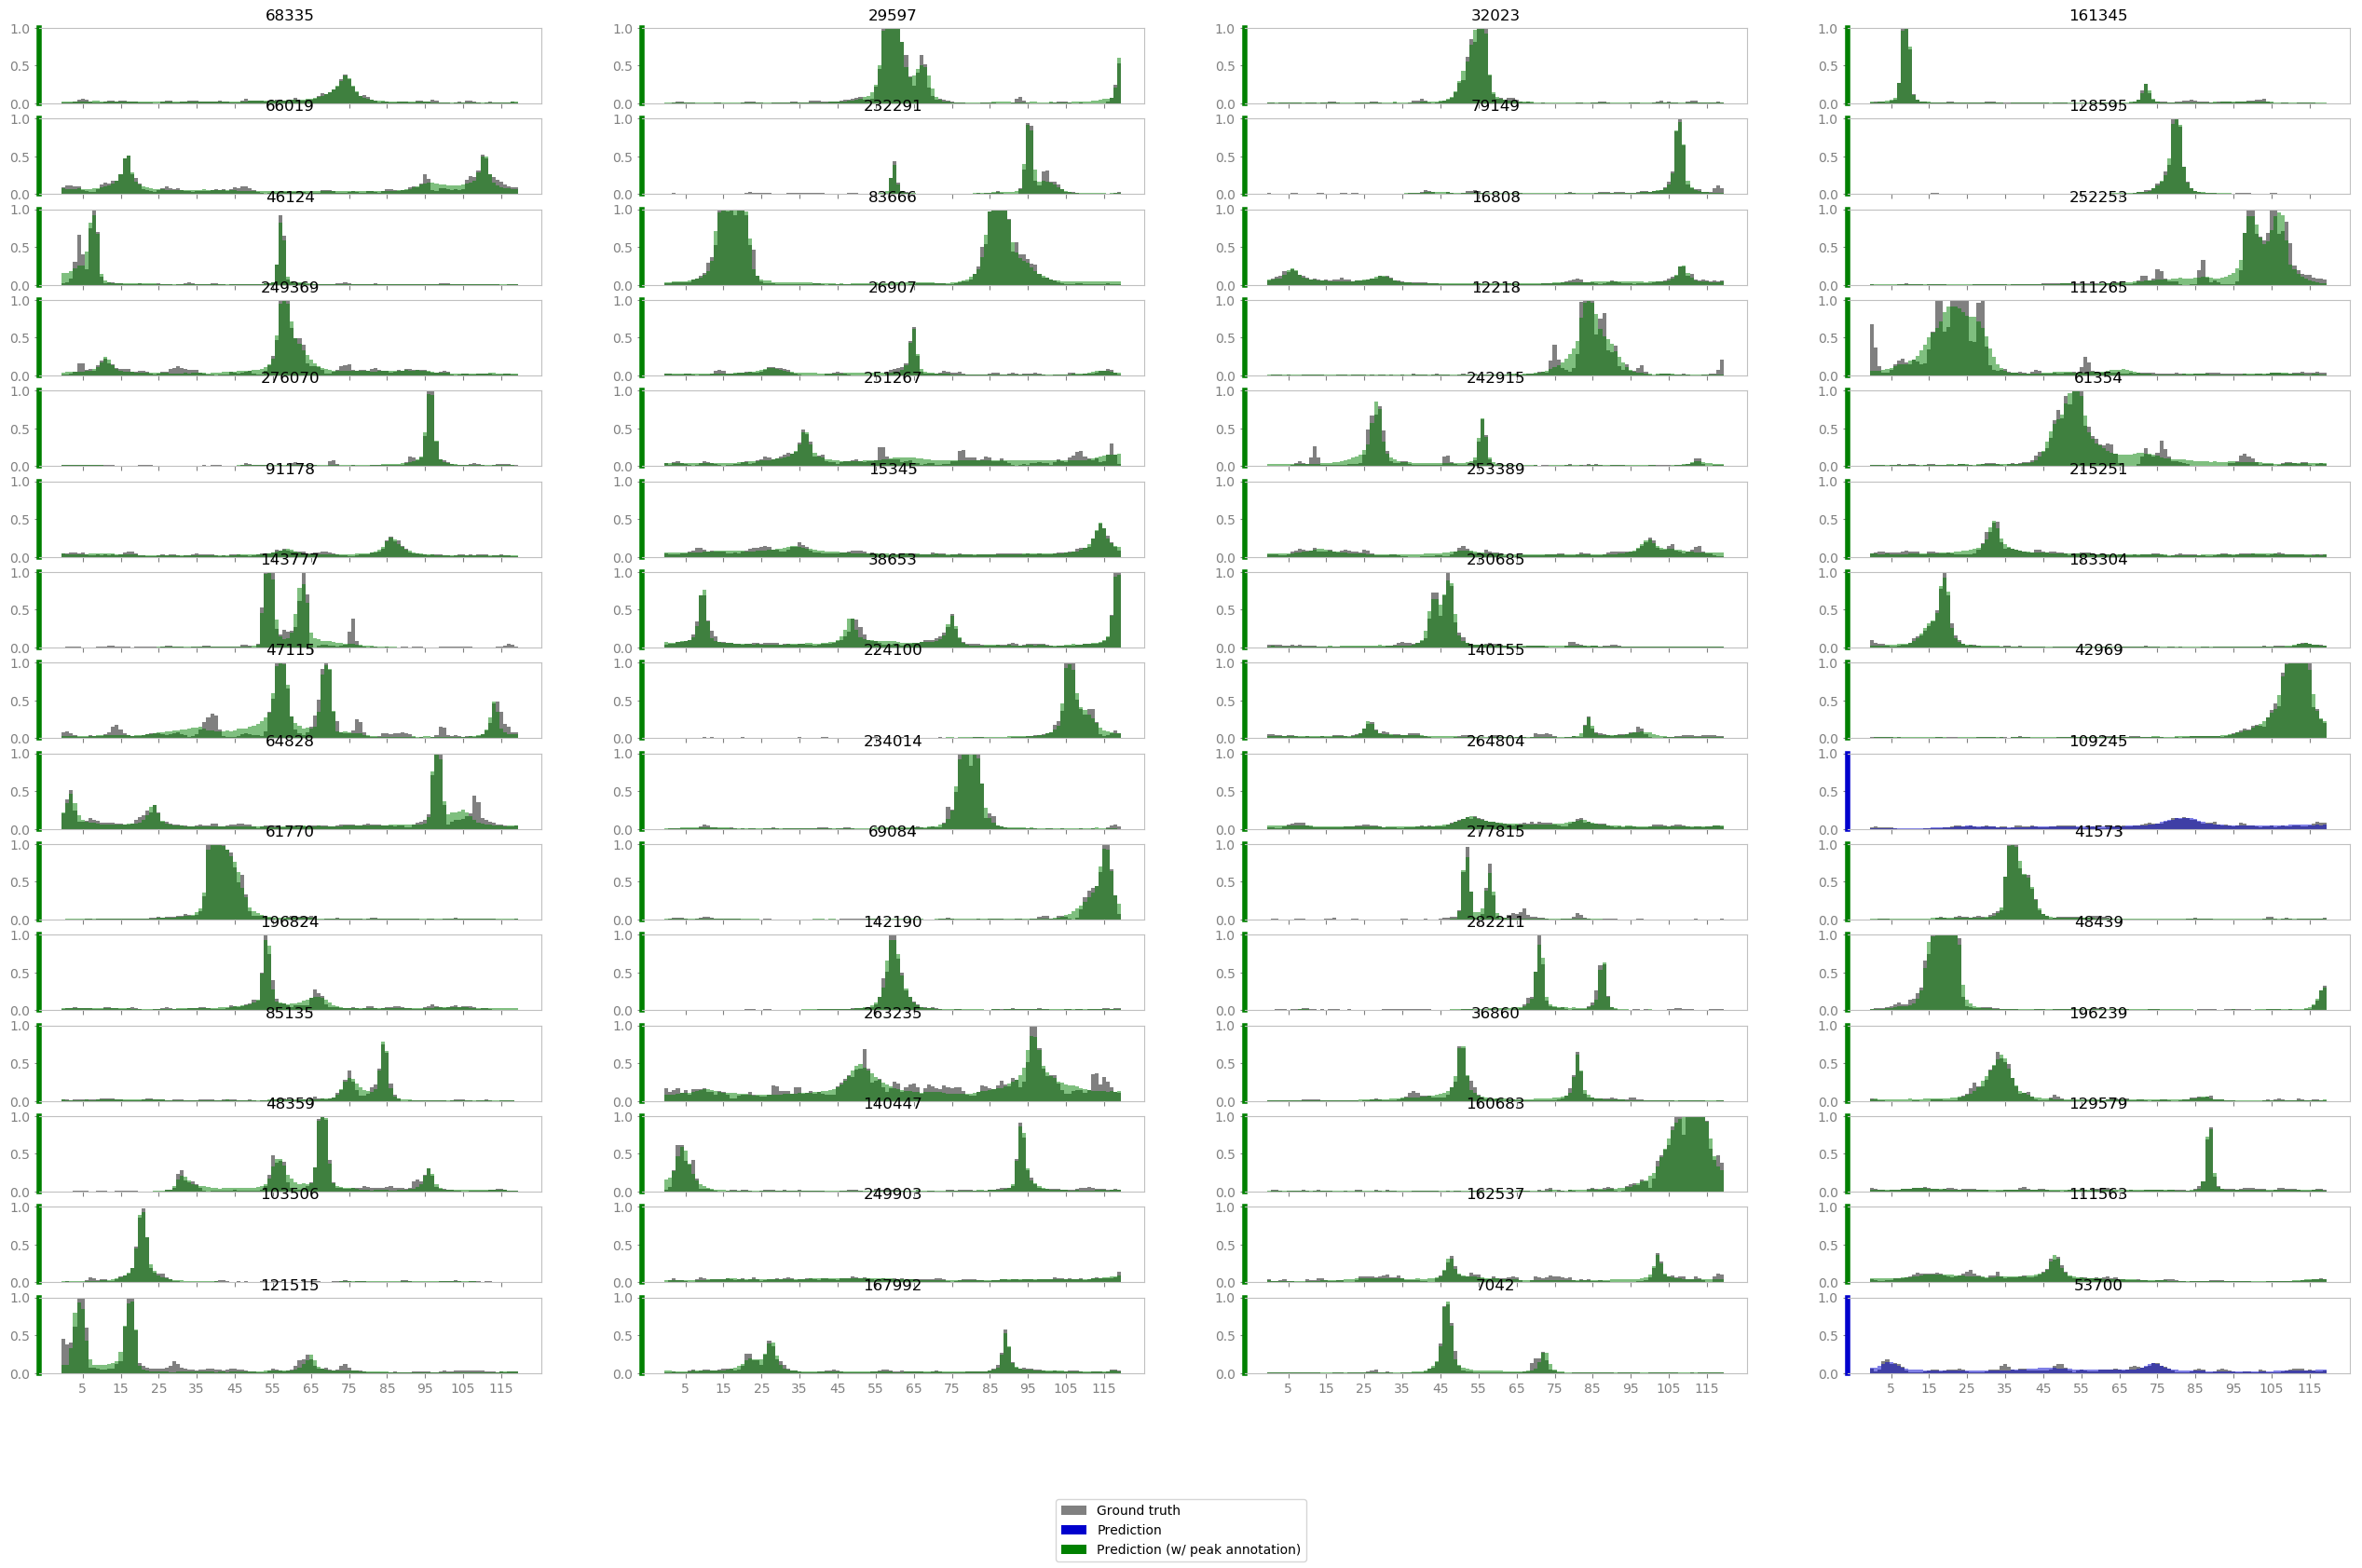

In [7]:
from IPython.core.display import Image, display

for model in qgw.get_selected_df().iterrows():
    print(model[0])
    display(Image(os.path.join(base, 'models', 'cf-{}---predictions-{}.png'.format(model[0], 'cnn-search'))))